In [1]:
%config InlineBackend.figure_formats = ['retina']

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm

sn.set()

In [3]:
panel_data = pd.read_csv('./data/panel_data_04_05.csv')

# Descriptive statistics

## Among the top rated profiles

In [4]:
# I have chosen 6 at random, in order to have not too many profiles
top_rated = panel_data[(panel_data.score>6)&(panel_data['Price/hour in USD']<200)]

In [5]:
np.mean(top_rated.score), np.max(top_rated.score), np.min(top_rated.score)

(6.885419006479482, 10.636, 6.0020000000000024)

In [6]:
old_profiles, new_profiles = top_rated[top_rated.scraping_date=='26-04-2021'], top_rated[top_rated.scraping_date=='17-05-2021']

In [7]:
np.mean(old_profiles['Price/hour in USD']), np.mean(new_profiles['Price/hour in USD'])

(36.563531114327176, 36.94108882521478)

## For the whole data set

In [8]:
def feature_evolution(feature: str, df: pd.DataFrame=panel_data) -> np.ndarray:
    u_names = np.unique(df.name)
    evol = np.zeros(len(u_names))
    for i,name in enumerate(u_names):
        tmp = df[df.name==name]
        if len(tmp)==2:
            feature_val = tmp[feature].values
            if feature_val[0]!=0:
                feature_evol = feature_val[1]/feature_val[0]-1
                evol[i] = feature_evol
    return evol

In [9]:
def display_info(feature_evol: np.ndarray):
    print('Average evolution: {}%'.format(round(np.mean(feature_evol),2)))
    print('Maximum evolution: {}%'.format(round(np.max(feature_evol),2)))
    print('Minimum evolution: {}%'.format(round(np.min(feature_evol),2)))

## Plot the evolution over time

### For the prices

In [10]:
prices_evol = feature_evolution('Price/hour in USD')

In [11]:
prices_evol *= 100

In [12]:
display_info(prices_evol)

Average evolution: 1.11%
Maximum evolution: 261.87%
Minimum evolution: -66.67%


In [14]:
prices_evol = prices_evol[np.abs(prices_evol)<50]

In [15]:
display_info(prices_evol)

Average evolution: 0.78%
Maximum evolution: 44.81%
Minimum evolution: -37.14%


Text(0.5, 0, 'Price evolution in %')

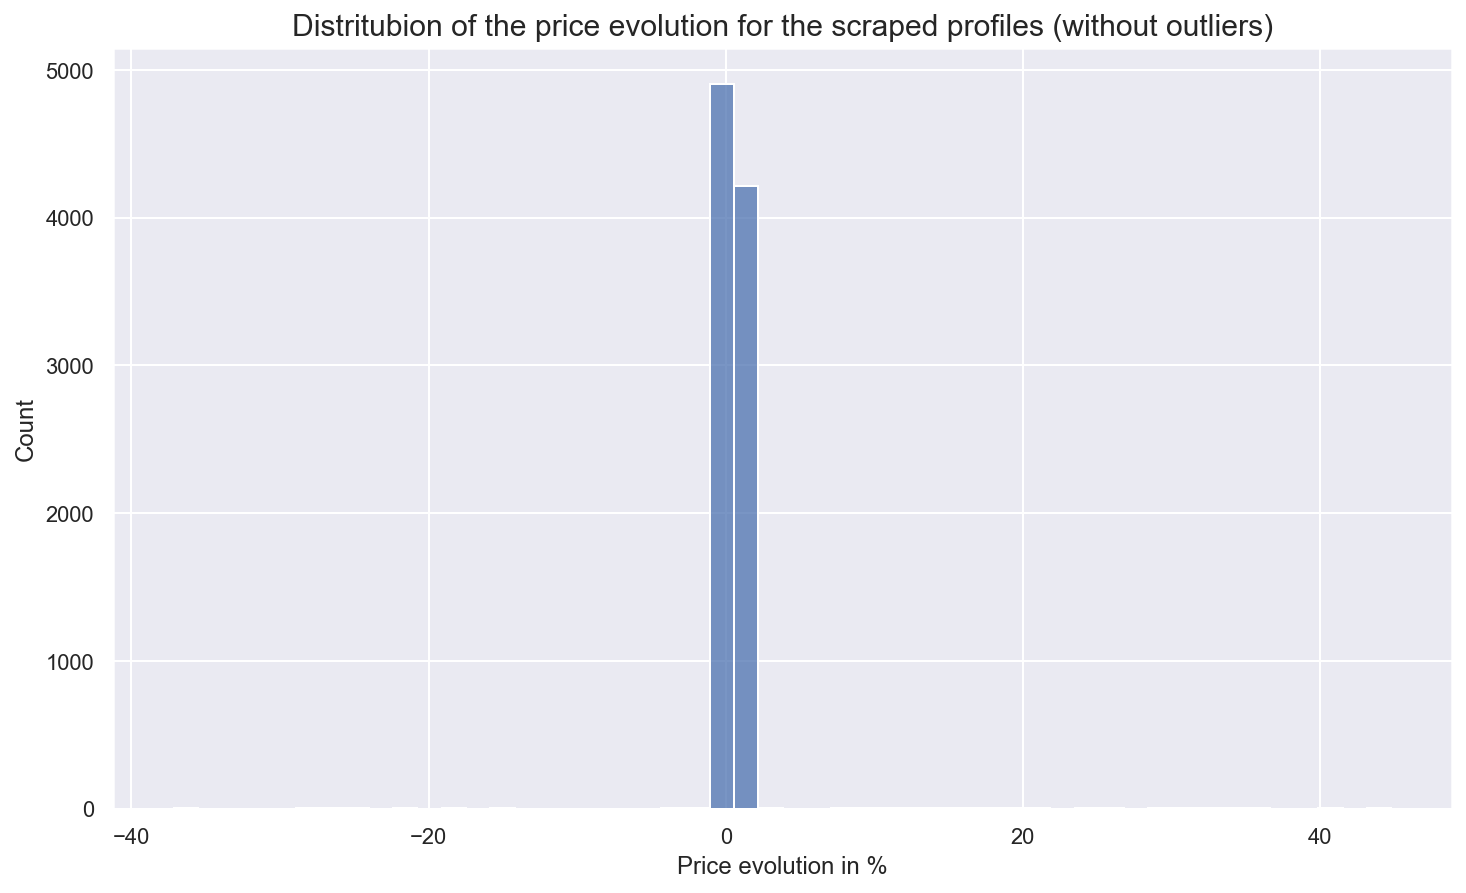

In [40]:
plt.figure(figsize=(12,7))
sn.histplot(x=prices_evol, bins=50)
plt.title('Distritubion of the price evolution for the scraped profiles (without outliers)', size=15)
plt.xlabel('Price evolution in %', size=12)

The price evolution is rather small, although not null. From the plot, we can see that the majority of the evolutions are close to 0%, but still many of the evolution are close to 1%, which might indicate that the prices of the profiles are increasing on the platform over time.

### For the score

In [17]:
score_evol = feature_evolution('score')

In [18]:
score_evol *= 100

In [19]:
display_info(score_evol)

Average evolution: 0.31%
Maximum evolution: 68.74%
Minimum evolution: -0.68%


In [21]:
score_evol = score_evol[np.abs(score_evol)<50]

In [22]:
display_info(score_evol)

Average evolution: 0.27%
Maximum evolution: 43.2%
Minimum evolution: -0.68%


Text(0.5, 0, 'Score evolution in %')

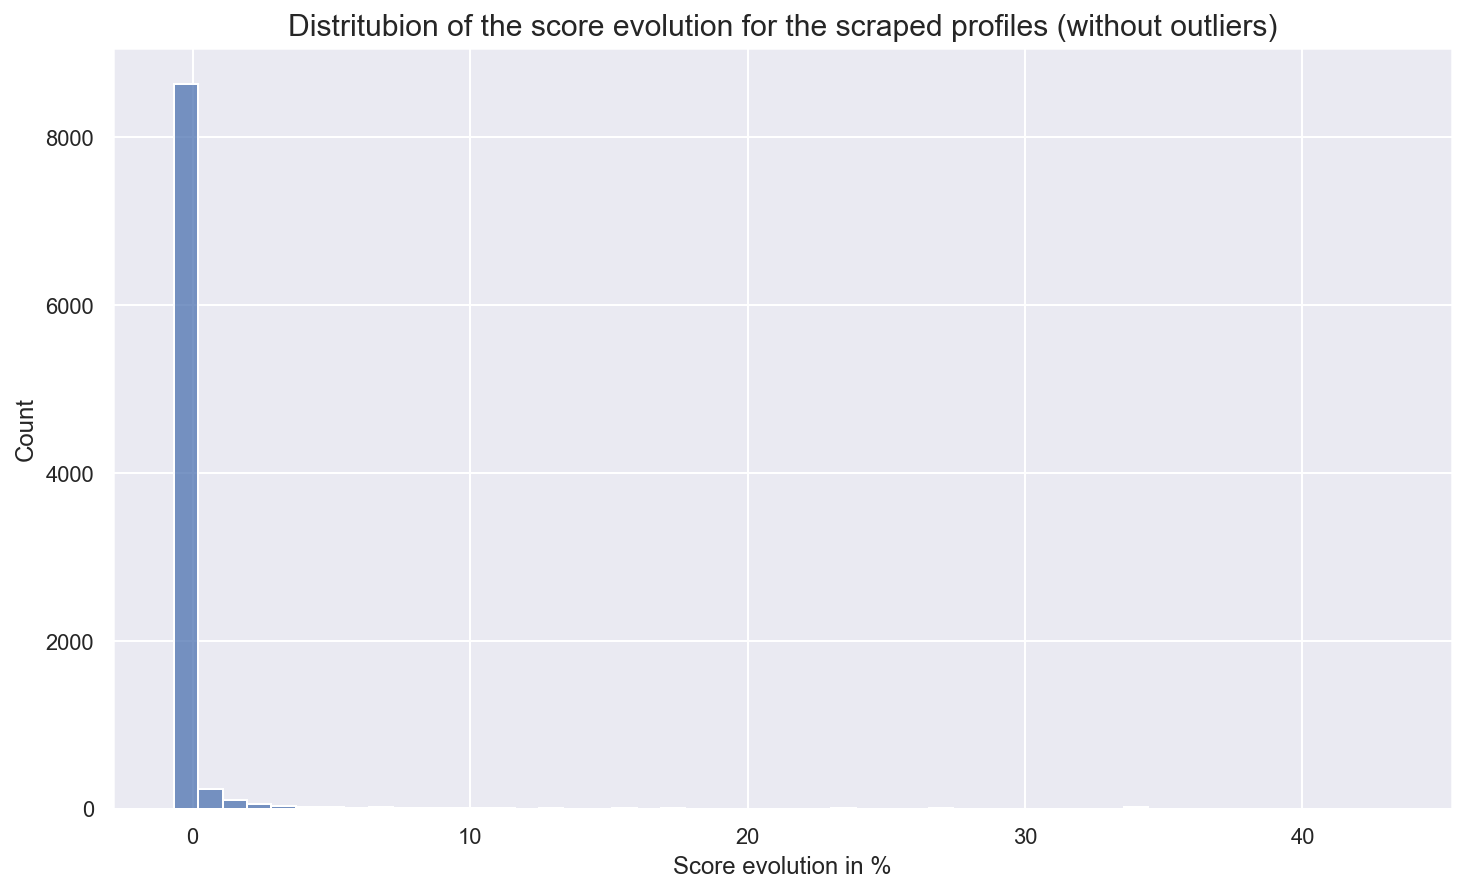

In [41]:
plt.figure(figsize=(12,7))
sn.histplot(x=score_evol, bins=50)
plt.title('Distritubion of the score evolution for the scraped profiles (without outliers)', size=15)
plt.xlabel('Score evolution in %', size=12)

When removing some of the outliers (that are not really significant, they represent only a very small percentage of the profiles), we can see that the score of the profiles did not really change between the two dates (the % of evolution is very very small). Therefore, the panel data might not be very relevant, and we should focus our study on only one scraping date (the period is not large enough to see a real evolution among the profiles.

### For the number of projects

In [24]:
nb_projects_evol = feature_evolution('nb_projects')

In [25]:
nb_projects_evol *= 100

In [26]:
display_info(nb_projects_evol)

Average evolution: 1.07%
Maximum evolution: 300.0%
Minimum evolution: 0.0%


In [27]:
nb_projects_evol = nb_projects_evol[np.abs(nb_projects_evol)<50]

In [28]:
display_info(nb_projects_evol)

Average evolution: 0.52%
Maximum evolution: 44.44%
Minimum evolution: 0.0%


Text(0.5, 0, 'Number of projects completed evolution in %')

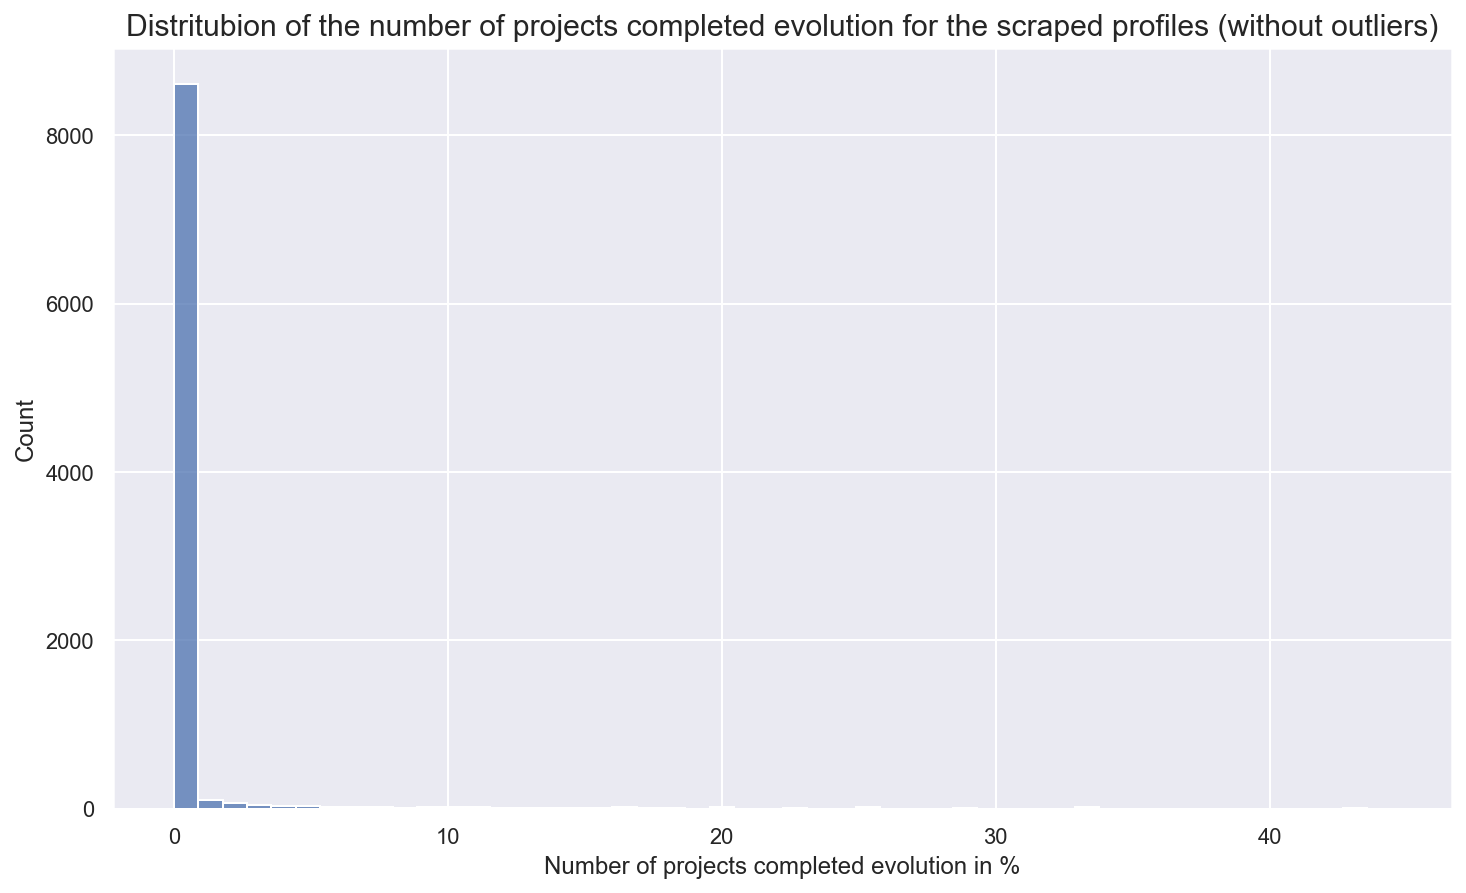

In [37]:
plt.figure(figsize=(12,7))
sn.histplot(x=nb_projects_evol, bins=50)
plt.title('Distritubion of the number of projects completed evolution for the scraped profiles (without outliers)', size=15)
plt.xlabel('Number of projects completed evolution in %', size=12)